In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from operator import itemgetter
from pathlib import Path
import os

In [22]:
# Loading the dataset
current_path = os.getcwd()
dataset_path =  os.path.abspath(os.path.join(current_path, os.pardir)) + "\Dataset\spotifyData.csv"
spotify_dataset = pd.read_csv(dataset_path)

categorical_features = ['artist', 'top.genre', 'year']
numerical_features = ['bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop', 'emo', 'ins']

spotify_dataset_numerical_features = spotify_dataset[numerical_features]
spotify_dataset_categorical_features = spotify_dataset[categorical_features]


array([[<AxesSubplot:title={'center':'bpm'}>,
        <AxesSubplot:title={'center':'nrgy'}>,
        <AxesSubplot:title={'center':'dnce'}>,
        <AxesSubplot:title={'center':'dB'}>,
        <AxesSubplot:title={'center':'live'}>],
       [<AxesSubplot:title={'center':'val'}>,
        <AxesSubplot:title={'center':'dur'}>,
        <AxesSubplot:title={'center':'acous'}>,
        <AxesSubplot:title={'center':'spch'}>,
        <AxesSubplot:title={'center':'pop'}>],
       [<AxesSubplot:title={'center':'emo'}>,
        <AxesSubplot:title={'center':'ins'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

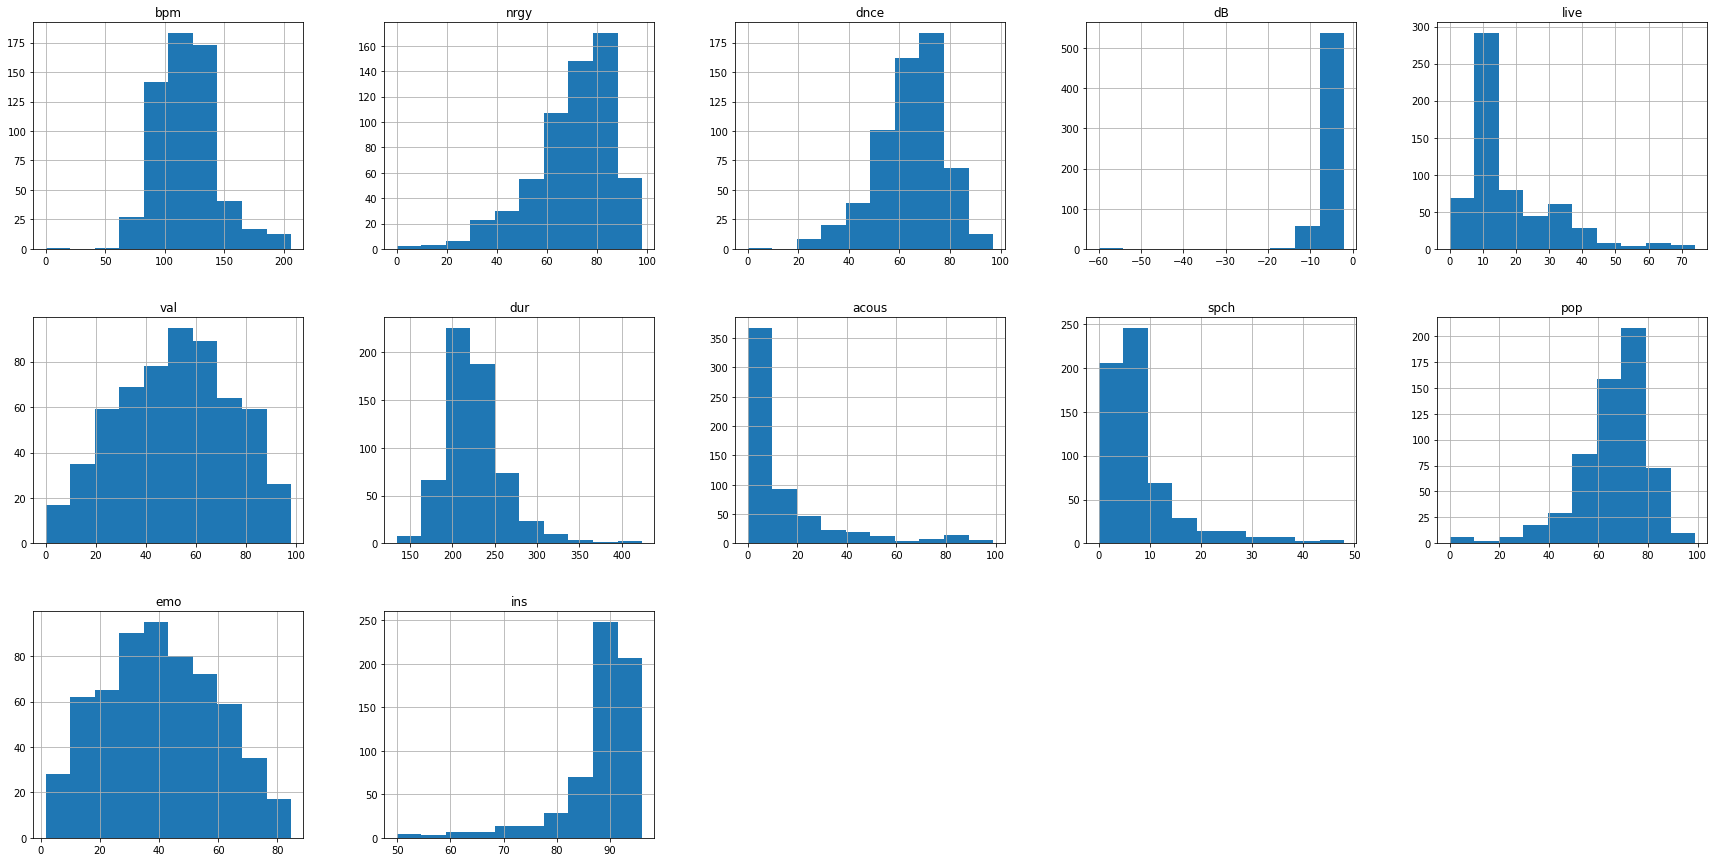

In [23]:
#plotting histogram of all numerical features in one figure
spotify_dataset[numerical_features].hist(bins=10, figsize=(30, 15), layout=(3, 5))



C:\Users\MSI\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'neo mellow'),
 Text(1, 0, 'detroit hip hop'),
 Text(2, 0, 'dance pop'),
 Text(3, 0, 'pop'),
 Text(4, 0, 'canadian pop'),
 Text(5, 0, 'hip pop'),
 Text(6, 0, 'barbadian pop'),
 Text(7, 0, 'atl hip hop'),
 Text(8, 0, 'australian pop'),
 Text(9, 0, 'indie pop'),
 Text(10, 0, 'art pop'),
 Text(11, 0, 'colombian pop'),
 Text(12, 0, 'big room'),
 Text(13, 0, 'british soul'),
 Text(14, 0, 'chicago rap'),
 Text(15, 0, 'acoustic pop'),
 Text(16, 0, 'permanent wave'),
 Text(17, 0, 'boy band'),
 Text(18, 0, 'baroque pop'),
 Text(19, 0, 'celtic rock'),
 Text(20, 0, 'electro'),
 Text(21, 0, 'complextro'),
 Text(22, 0, 'canadian hip hop'),
 Text(23, 0, 'candy pop'),
 Text(24, 0, 'alaska indie'),
 Text(25, 0, 'folk-pop'),
 Text(26, 0, 'metropopolis'),
 Text(27, 0, 'house'),
 Text(28, 0, 'australian hip hop'),
 Text(29, 0, 'electropop'),
 Text(30, 0, 'australian dance'),
 Text(31, 0, 'hollywood'),
 Text(32, 0, 'canadian contemporary r&b'),
 Text(33, 0, 'irish singer-songwriter'),
 Text(34

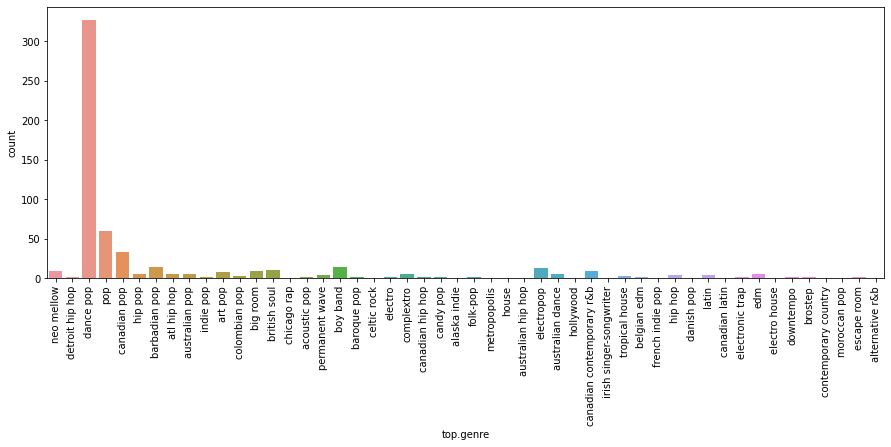

In [38]:
plt.figure(figsize=(15,5))
chart = sns.countplot(spotify_dataset['top.genre'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

C:\Users\MSI\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, '2010'),
 Text(1, 0, '2011'),
 Text(2, 0, '2012'),
 Text(3, 0, '2013'),
 Text(4, 0, '2014'),
 Text(5, 0, '2015'),
 Text(6, 0, '2016'),
 Text(7, 0, '2017'),
 Text(8, 0, '2018'),
 Text(9, 0, '2019')]

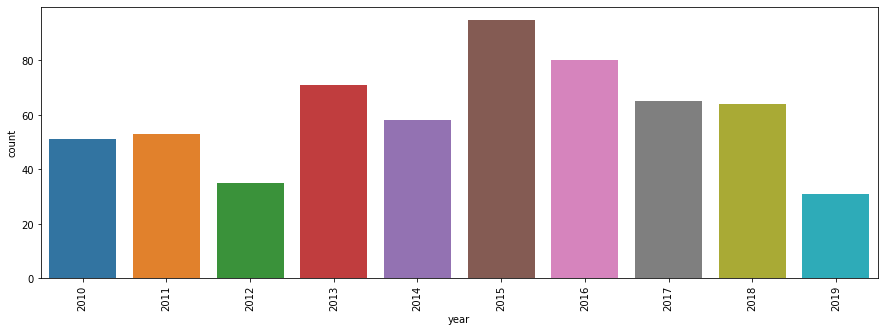

In [39]:
plt.figure(figsize=(15,5))
chart = sns.countplot(spotify_dataset['year'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

C:\Users\MSI\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'Train'),
 Text(1, 0, 'Eminem'),
 Text(2, 0, 'Kesha'),
 Text(3, 0, 'Lady Gaga'),
 Text(4, 0, 'Bruno Mars'),
 Text(5, 0, 'Justin Bieber'),
 Text(6, 0, 'Taio Cruz'),
 Text(7, 0, 'OneRepublic'),
 Text(8, 0, 'Alicia Keys'),
 Text(9, 0, 'Rihanna'),
 Text(10, 0, 'Flo Rida'),
 Text(11, 0, 'Mike Posner'),
 Text(12, 0, 'Far East Movement'),
 Text(13, 0, 'Usher'),
 Text(14, 0, 'Sean Kingston'),
 Text(15, 0, 'The Black Eyed Peas'),
 Text(16, 0, 'Adam Lambert'),
 Text(17, 0, 'Maroon 5'),
 Text(18, 0, 'Neon Trees'),
 Text(19, 0, 'Selena Gomez & The Scene'),
 Text(20, 0, 'Enrique Iglesias'),
 Text(21, 0, 'Katy Perry'),
 Text(22, 0, 'Britney Spears'),
 Text(23, 0, '3OH!3'),
 Text(24, 0, 'David Guetta'),
 Text(25, 0, 'Christina Aguilera'),
 Text(26, 0, 'Florence + The Machine'),
 Text(27, 0, 'Shakira'),
 Text(28, 0, 'Tinie Tempah'),
 Text(29, 0, 'T.I.'),
 Text(30, 0, 'Martin Solveig'),
 Text(31, 0, 'Christina Perri'),
 Text(32, 0, 'Adele'),
 Text(33, 0, 'Pitbull'),
 Text(34, 0, 'Beyonc�'),

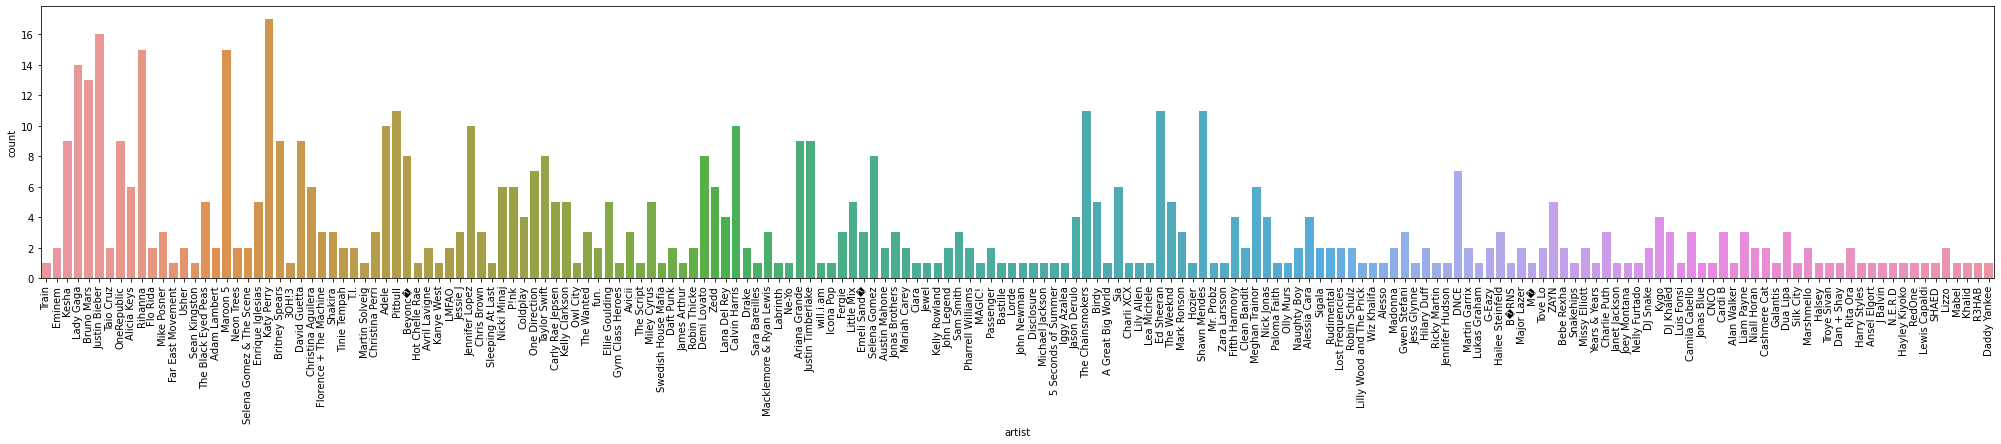

In [40]:
plt.figure(figsize=(35,5))
chart = sns.countplot(spotify_dataset['artist'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

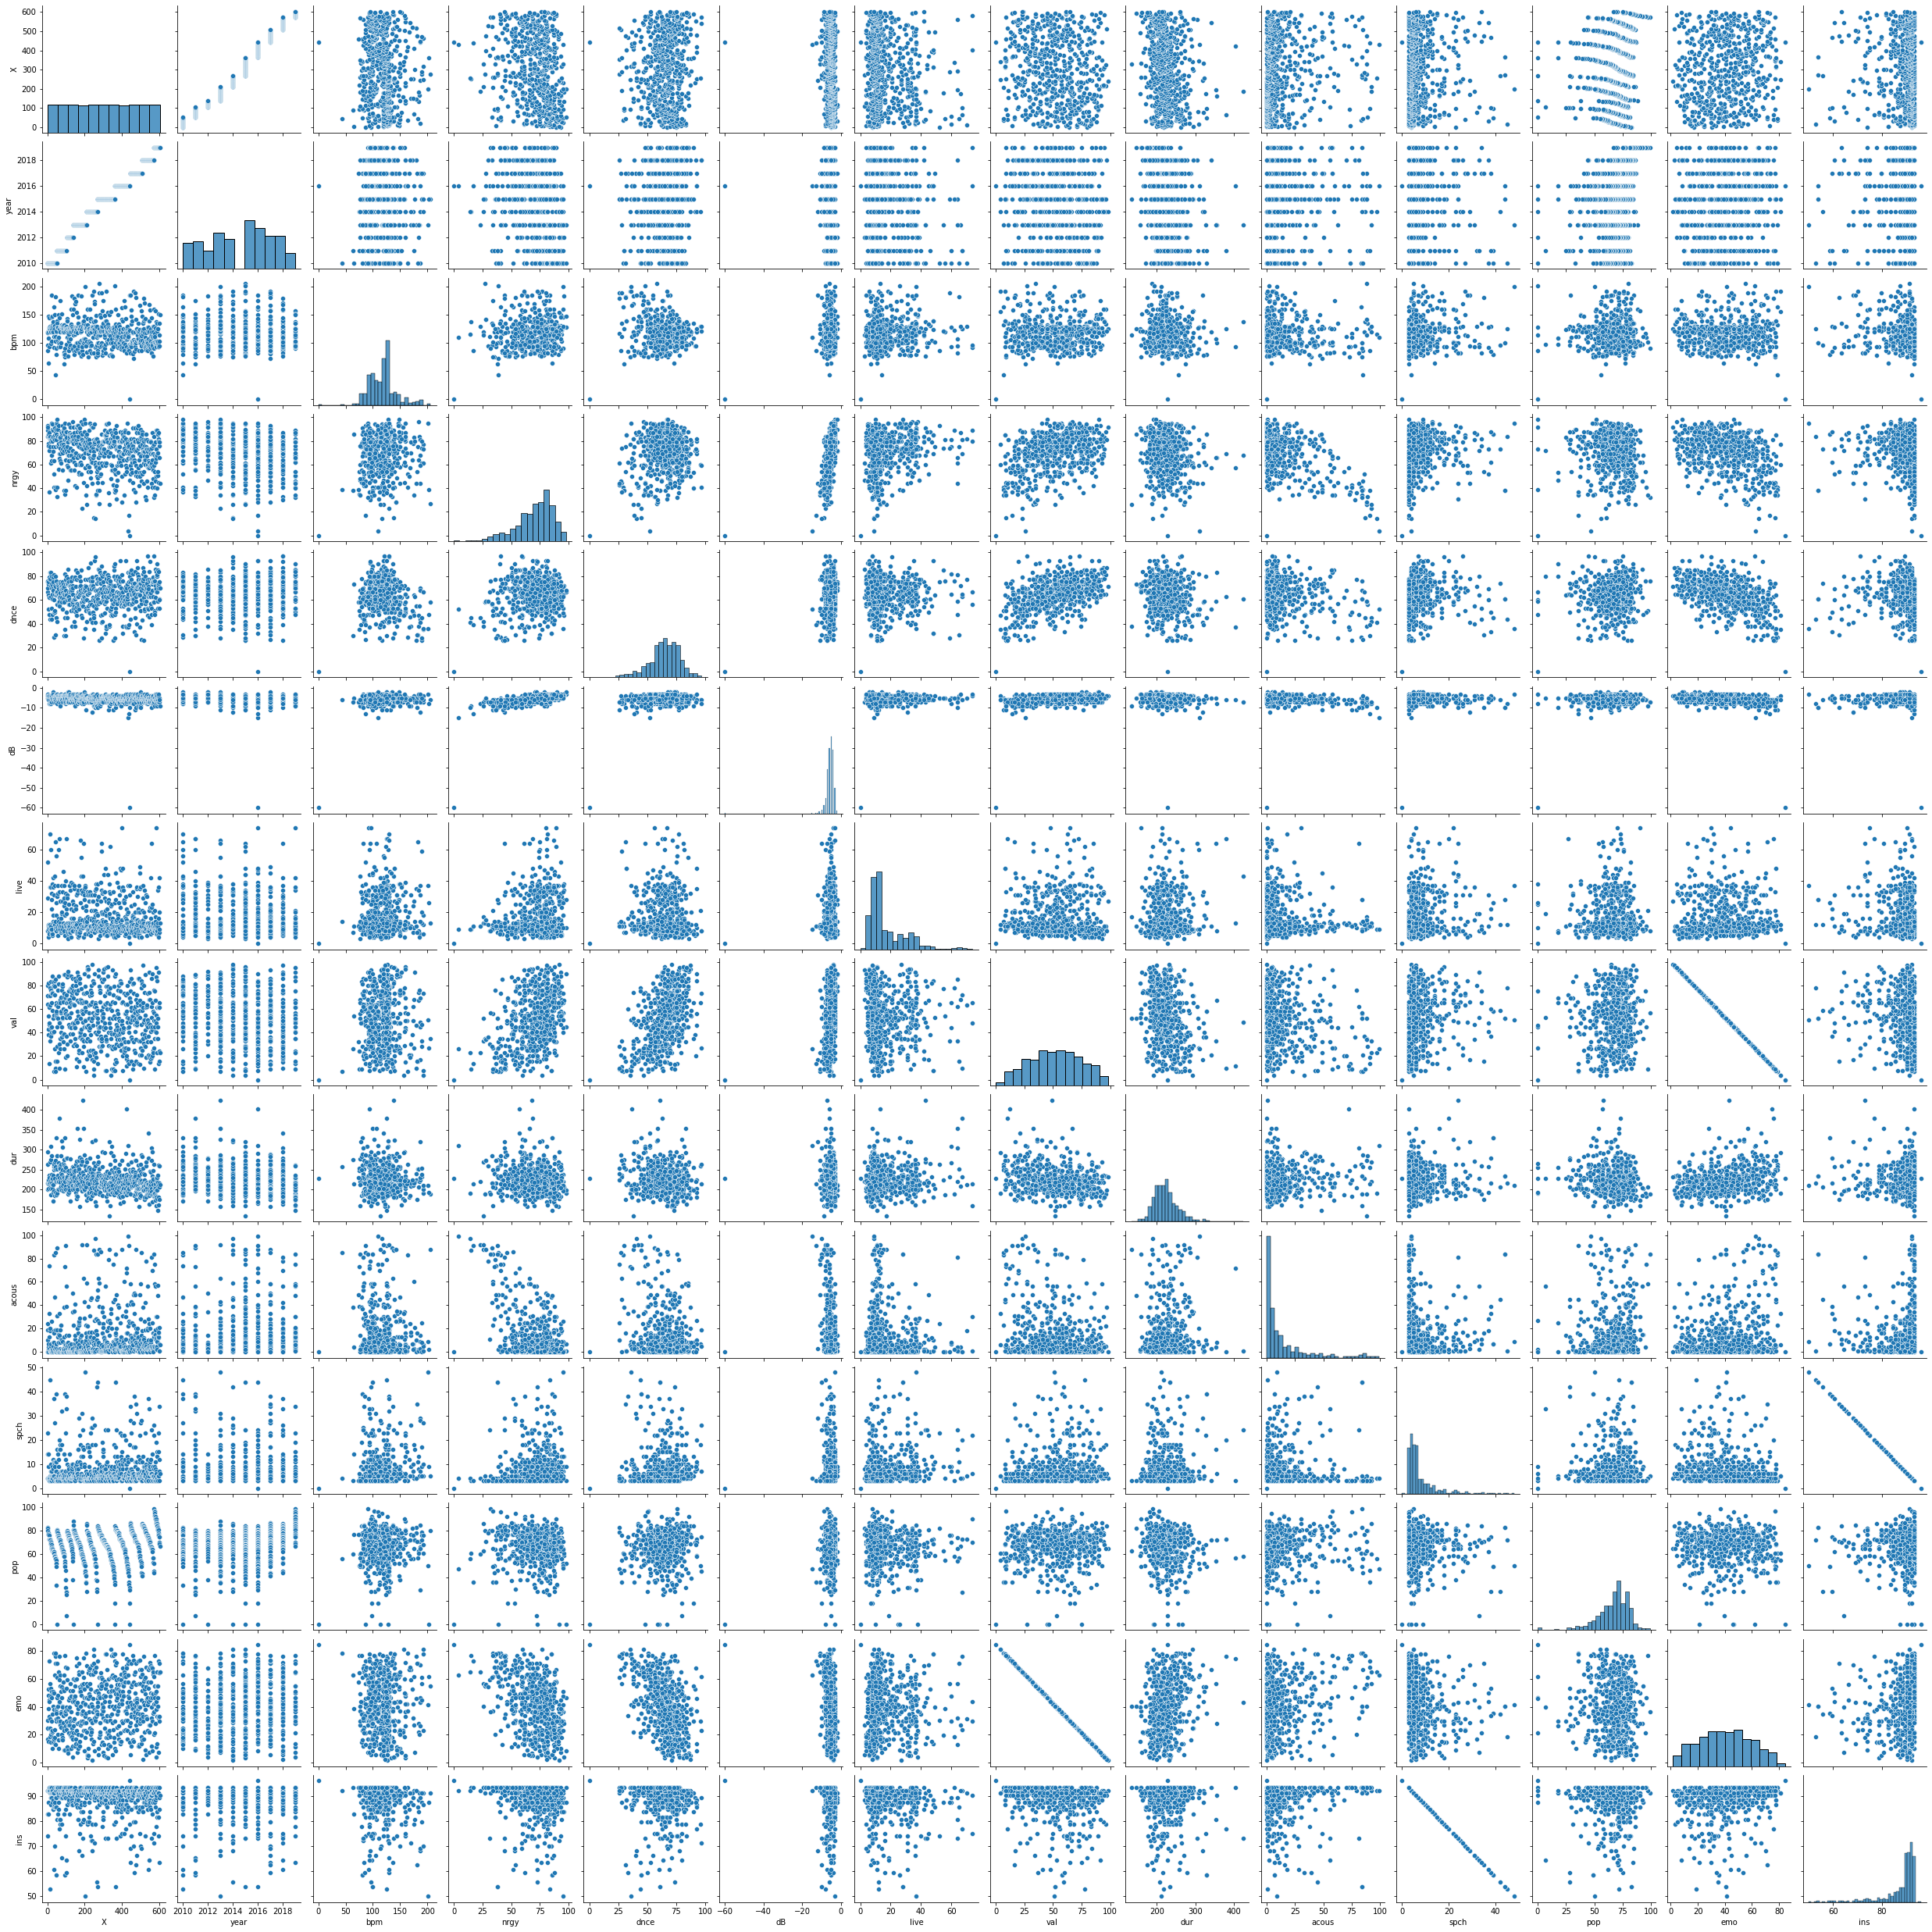

In [68]:
pairplot = sns.pairplot(spotify_dataset)

In [41]:
print(spotify_dataset_numerical_features.corr())
corr_mat = (spotify_dataset_numerical_features.corr()).to_numpy()

            bpm      nrgy      dnce        dB      live       val       dur  \
bpm    1.000000  0.124137 -0.138333  0.180424  0.084107  0.012311 -0.032960   
nrgy   0.124137  1.000000  0.161512  0.536170  0.186260  0.412384 -0.142981   
dnce  -0.138333  0.161512  1.000000  0.237356 -0.032898  0.494394 -0.176270   
dB     0.180424  0.536170  0.237356  1.000000  0.086176  0.282233 -0.103516   
live   0.084107  0.186260 -0.032898  0.086176  1.000000  0.013234  0.100987   
val    0.012311  0.412384  0.494394  0.282233  0.013234  1.000000 -0.261069   
dur   -0.032960 -0.142981 -0.176270 -0.103516  0.100987 -0.261069  1.000000   
acous -0.119691 -0.563992 -0.233283 -0.190193 -0.104415 -0.254873  0.091867   
spch   0.058213  0.106932 -0.025907  0.000574  0.147848  0.124100  0.056637   
pop    0.013700 -0.063440  0.103451  0.162295 -0.063480  0.039346 -0.103757   
emo   -0.011924 -0.411086 -0.499721 -0.280618 -0.020582 -1.000000  0.262801   
ins   -0.058381 -0.105598  0.027398  0.000210 -0.147

(603, 2)
(603, 1)
(603, 2)
(603, 1)


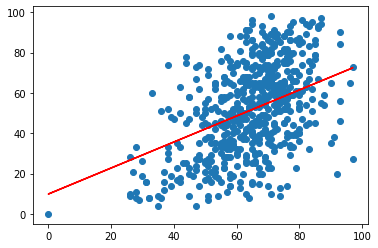

(603, 2)
MSE is  452.56027386749355
MAE is  17.2624565345889


In [93]:
# regression of valence using the quantitive variables
# univariate regression

# sorting ascendingly the features that are correlated with VALENCE
valence_corr_features_idx = np.argsort(corr_mat[5, :])

# print(valence_corr_features_idx)
# for idx in valence_corr_features_idx:
#     print(corr_mat[5,idx])
# print(corr_mat[5, valence_corr_features_idx[-2]])

# finding the most correlated feature
most_corr_feature_idx = valence_corr_features_idx[-2]
most_corr_feature = numerical_features[most_corr_feature_idx]
# print(most_corr_feature)

Temp = (spotify_dataset[most_corr_feature]).to_numpy()
Temp = Temp.reshape((len(Temp), 1))

ones = np.ones((len(spotify_dataset.index), 1))
X = np.append(ones, Temp, axis=1)

Temp2 = spotify_dataset['val'].to_numpy()
y = Temp2.reshape((len(Temp2), 1))

# implementing univariate regression

print(X.shape)
print(y.shape)


# print(X[442,1])
# print(y[442,0])

plt.scatter(X[:, 1], y)
# plt.scatter(range(1,604), y)

# plt.show()
# X = X[np.logical_not(np.isnan(X))]
# y = y[np.logical_not(np.isnan(y))]


print(X.shape)
print(y.shape)

X = np.nan_to_num(X)
y = np.nan_to_num(y)


LR = LinearRegression().fit(X, y)
y_pred = LR.predict(X)

plt.plot(X[:,1], y_pred, color='r')
# plt.plot(range(1,604), y_pred, color='r')
plt.show()
print(X.shape)
print("MSE is ", mean_squared_error(y, y_pred))
print("MAE is ", mean_absolute_error(y, y_pred))

[10  6  7 11  0  4  9  8  3  1  2]
['emo', 'dur', 'acous', 'ins', 'bpm', 'live', 'pop', 'spch', 'dB', 'nrgy', 'dnce']


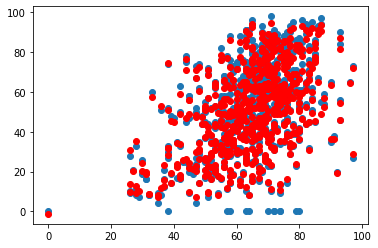

MSE is  87.73417369934371
MAE is  2.903529948403517


In [107]:
# regression of valence using the quantitive variables
# multiple regression
# finding the most correlated feature
most_corr_feature_idices = valence_corr_features_idx[-12:-1]
most_corr_features = list(itemgetter(*most_corr_feature_idices)(numerical_features))
print(most_corr_feature_idices)
print(most_corr_features)


plt.scatter(spotify_dataset[most_corr_feature], y)

Temp = (spotify_dataset[most_corr_features]).to_numpy()

ones = np.ones((len(spotify_dataset.index), 1))
X = np.append(ones, Temp, axis=1)
X = np.nan_to_num(X)



multiple_regression = LinearRegression().fit(X, y)
y_pred = multiple_regression.predict(X)

plt.scatter(spotify_dataset[most_corr_feature], y_pred, color='r')
plt.show()

print("MSE is ", mean_squared_error(y, y_pred))
print("MAE is ", mean_absolute_error(y, y_pred))

In [ ]:
# predictiong genre from quantitive variables
# predictiong the year from the variables


# fig, ax = plt.subplots(3, 4, figsize=(60, 30))
# for var, subplot in zip(spotify_dataset[numerical_features], ax.flatten()):
#     sns.boxplot(x=var, y='top.genre', data=spotify_dataset, ax=subplot)

In [ ]:
# reg